**决策树分类**

In [508]:
# 相关API
import sklearn.tree as st

model = st.DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=3,
    random_state=7)
# model.fit()

**预测小汽车等级**
1. 加载数据
2. 特征分析与特征工程
3. 数据预处理(标签编码)
4. 训练模型
5. 模型测试

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [510]:
data = pd.read_csv('./data/car.txt',
                   header=None)  # 取消原始特征名，用数字代替
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**特征名：**
+ 汽车价格、维修费用、车门数量、载客数、后备箱、安全性、汽车级别

In [511]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [512]:
data[0].value_counts()

vhigh    432
high     432
med      432
low      432
Name: 0, dtype: int64

In [513]:
len(data)

1728

In [514]:
data_fn = np.copy(data)
data_fn

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype=object)

In [515]:
data_fn = pd.DataFrame(data_fn)
data_fn.columns=['汽车价格', '维修费用', '车门数量', '载客数', '后备箱', '安全性', '汽车级别']

In [516]:
data_fn

,汽车价格,维修费用,车门数量,载客数,后备箱,安全性,汽车级别
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**分类问题：**
+ 预测汽车级别，离散值
+ 逻辑回归、决策树、RF随机森林、GBDT、AdaBoost
+ 相似输入产生相似输出，使用tree类模型 --> RF随机森林

In [517]:
# 特征工程 --> 目前特征都保留
# 预处理，字符串改数字 --> 使用决策树，不必关注数字顺序，但使用逻辑回归则需要注意数字敏感度

**标签编码预处理**

In [518]:
import sklearn.preprocessing as sp
import sklearn.ensemble as se 
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sm
# 遍历每一列数据
encoders = {}
for col_ind, col_val in data_fn.items():
    encoder = sp.LabelEncoder()
    data_fn[col_ind]=encoder.fit_transform(col_val)
    encoders[col_ind] = encoder  # 将编码器存储在encoders字典中
# 整理输入集与输出集，拿所有样本训练
x, y = data_fn.iloc[:,:-1],data_fn['汽车级别']
# 创建分类模型
model = se.RandomForestClassifier(max_depth=9, n_estimators=270, random_state=22)

# 做交叉验证，验证模型是否可用
# scores = cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
# scores.mean()

**调整超参数n_estimators**

In [519]:
import sklearn.model_selection as ms
# 验证曲线，选取最优超参数
params = np.arange(250,350,10)
train_score, test_score=ms.validation_curve(model, x, y, param_name='n_estimators', param_range=params, cv=5)
scores = test_score.mean(axis=1)

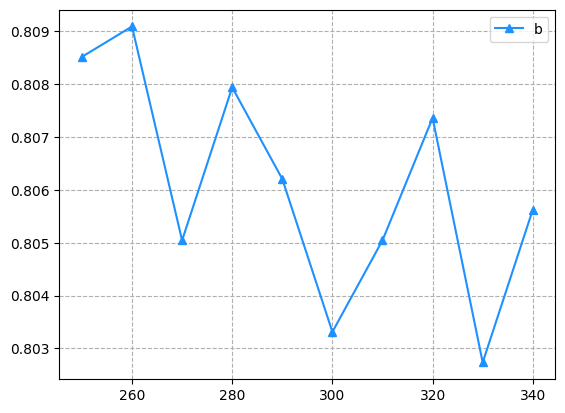

In [520]:
# 验证曲线可视化
plt.grid(linestyle='--')
plt.plot(params,scores,'^-',color='dodgerblue',label='n_estimators CV')
plt.legend('best')
plt.show()

**调整超参数max_depth**

In [521]:
# 调整max_depth
params = np.arange(1,12)
train_score, test_score=ms.validation_curve(model, x, y, param_name='max_depth', param_range=params, cv=5)
scores = test_score.mean(axis=1)

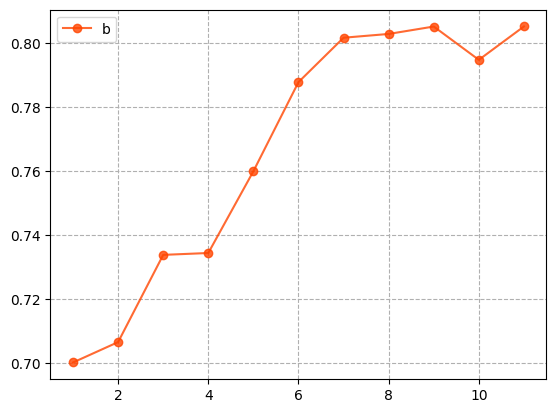

In [522]:
# 验证曲线可视化
plt.grid(linestyle='--')
plt.plot(params,scores,'o-',color='orangered',label='max_depth CV',alpha=0.8)
plt.legend('best')
plt.show()

**学习曲线，选取最优训练集大小**

In [529]:
params=np.arange(0.1, 1.1, 0.1)
_, train_score, test_score=ms.learning_curve(model,x,y,train_sizes=params,cv=5)
scores=test_score.mean(axis=1)

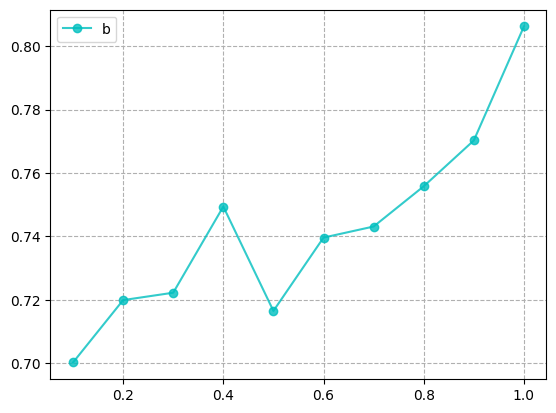

In [530]:
# 学习曲线可视化
plt.grid(linestyle='--')
plt.plot(params,scores,'o-',color='c',label='learning_curve CV',alpha=0.8)
plt.legend('best')
plt.show()

**模型评估：**
+ 先用训练样本进行模型评估

In [523]:
model.fit(x,y)
pred_y = model.predict(x)
print(sm.classification_report(y, pred_y))
# 输出混淆矩阵
print(sm.confusion_matrix(y,pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       384
           1       1.00      0.78      0.88        69
           2       1.00      1.00      1.00      1210
           3       0.94      1.00      0.97        65

    accuracy                           0.99      1728
   macro avg       0.98      0.94      0.96      1728
weighted avg       0.99      0.99      0.99      1728

[[ 383    0    0    1]
 [  12   54    0    3]
 [   3    0 1207    0]
 [   0    0    0   65]]


In [524]:
# 测试数据
data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
        ['high', 'high', '2', '4', 'small', 'high', 'good'],
        ['low', 'low', '2', '4', 'small', 'high', 'good'],
        ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

test_data = pd.DataFrame(data)

In [525]:

test_data.columns=['汽车价格', '维修费用', '车门数量', '载客数', '后备箱', '安全性', '汽车级别']

test_data

,汽车价格,维修费用,车门数量,载客数,后备箱,安全性,汽车级别
0,high,med,5more,4,big,low,unacc
1,high,high,2,4,small,high,good
2,low,low,2,4,small,high,good
3,low,med,3,4,med,high,vgood


In [526]:
import warnings
warnings.filterwarnings('ignore')

        
for col_ind, col_val in test_data.items():  
    encoder = encoders[col_ind]
    encode_col = encoder.transform(col_val)
    test_data[col_ind] = encode_col
    
# 整理输入集与输出集
test_x,test_y = test_data.iloc[:,:-1],test_data['汽车级别']
pred_y = model.predict(test_x)
encoders['汽车级别'].inverse_transform(pred_y)

array(['unacc', 'acc', 'good', 'vgood'], dtype=object)

In [527]:
data_fn.head()

,汽车价格,维修费用,车门数量,载客数,后备箱,安全性,汽车级别
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
